In [2]:
import qiskit
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import math

qasm = qiskit.Aer.get_backend("qasm_simulator")
statevector_simulator = qiskit.Aer.get_backend("statevector_simulator")

In [26]:
circuit = qiskit.QuantumCircuit (2, 2)

circuit.h(0)
circuit.h(1)

circuit.x(0)
circuit.x(1)

orig_statevec = qiskit.execute (circuit, backend=statevector_simulator).result().get_statevector()

circuit.measure([0, 1], [0, 1])

circuit.draw()

┌───┐┌───┐┌─┐   
q_0: |0>┤ H ├┤ X ├┤M├───
        ├───┤├───┤└╥┘┌─┐
q_1: |0>┤ H ├┤ X ├─╫─┤M├
        └───┘└───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═

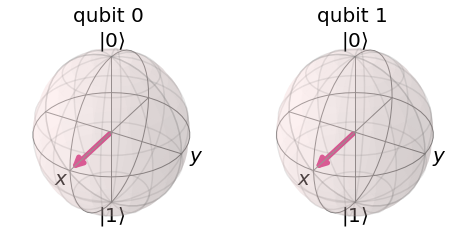

In [27]:
plot_bloch_multivector(orig_statevec)

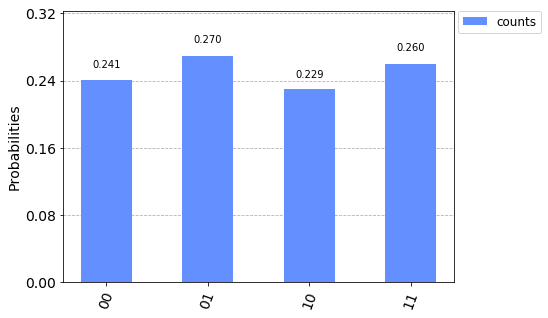

In [28]:
orig_counts = qiskit.execute (circuit, backend = qasm, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=["counts"])

In [29]:
def balanced_black_box (circuit):
    circuit.cx(0, 2)
    circuit.cx(1, 2)

    return circuit

def constant_black_box (circuit):
    return circuit

In [32]:
circuit = qiskit.QuantumCircuit(3, 2)
circuit = balanced_black_box(circuit)
circuit.draw()

q_0: |0>──■───────
          │       
q_1: |0>──┼────■──
        ┌─┴─┐┌─┴─┐
q_2: |0>┤ X ├┤ X ├
        └───┘└───┘
 c_0: 0 ══════════
                  
 c_1: 0 ══════════

In [50]:
circuit = qiskit.QuantumCircuit(3, 2)

circuit.x(2)
circuit.barrier()

circuit.h(0)
circuit.h(1)
circuit.h(2)

circuit.barrier()
circuit = balanced_black_box(circuit)
circuit.barrier()

circuit.h(0)
circuit.h(1)

circuit.measure([0, 1], [0, 1])

circuit.draw()

░ ┌───┐ ░            ░ ┌───┐┌─┐   
q_0: |0>──────░─┤ H ├─░───■────────░─┤ H ├┤M├───
              ░ ├───┤ ░   │        ░ ├───┤└╥┘┌─┐
q_1: |0>──────░─┤ H ├─░───┼────■───░─┤ H ├─╫─┤M├
        ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║ └╥┘
q_2: |0>┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫─
        └───┘ ░ └───┘ ░ └───┘└───┘ ░       ║  ║ 
 c_0: 0 ═══════════════════════════════════╩══╬═
                                              ║ 
 c_1: 0 ══════════════════════════════════════╩═

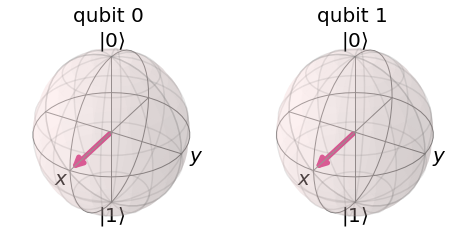

In [51]:
plot_bloch_multivector(orig_statevec)

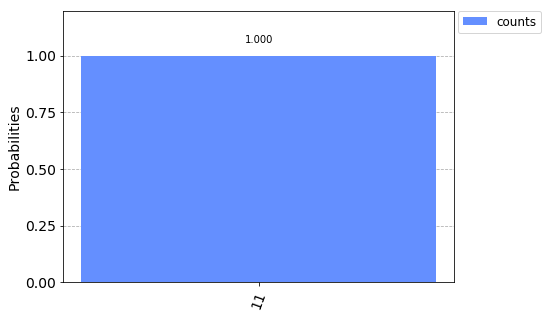

In [52]:
orig_counts = qiskit.execute (circuit, backend = qasm, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=["counts"])

In [53]:
circuit = qiskit.QuantumCircuit(3, 2)

circuit.x(2)
circuit.barrier()

circuit.h(0)
circuit.h(1)
circuit.h(2)

circuit.barrier()
circuit = constant_black_box(circuit)
circuit.barrier()

circuit.h(0)
circuit.h(1)

circuit.measure([0, 1], [0, 1])

circuit.draw()

░ ┌───┐ ░  ░ ┌───┐┌─┐   
q_0: |0>──────░─┤ H ├─░──░─┤ H ├┤M├───
              ░ ├───┤ ░  ░ ├───┤└╥┘┌─┐
q_1: |0>──────░─┤ H ├─░──░─┤ H ├─╫─┤M├
        ┌───┐ ░ ├───┤ ░  ░ └───┘ ║ └╥┘
q_2: |0>┤ X ├─░─┤ H ├─░──░───────╫──╫─
        └───┘ ░ └───┘ ░  ░       ║  ║ 
 c_0: 0 ═════════════════════════╩══╬═
                                    ║ 
 c_1: 0 ════════════════════════════╩═

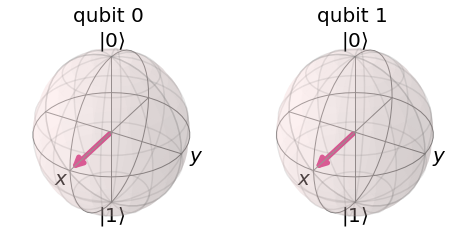

In [54]:
plot_bloch_multivector(orig_statevec)

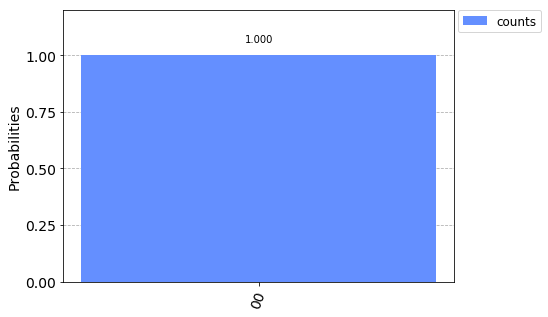

In [55]:
orig_counts = qiskit.execute (circuit, backend = qasm, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=["counts"])